In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pfad zur CSV-Datei
csv_file_path = '../data/imu_data.csv'

# CSV-Datei einlesen
data = pd.read_csv(csv_file_path)
data

,id,time_micros,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z
0,194,194912,10.193316,0.113099,-1.160317,0.032070,-0.065973,-0.000305
1,195,195912,10.155616,0.072408,-1.164506,0.032070,-0.065973,-0.000305
2,196,196912,10.146042,0.081982,-1.221355,0.032070,-0.065973,-0.000305
3,197,197912,10.141254,0.090958,-1.214772,0.032070,-0.065973,-0.000305
4,198,198912,10.160403,0.042487,-1.101074,0.032070,-0.065973,-0.000305
...,...,...,...,...,...,...,...,...
2043,189,22719912,9.782806,0.094549,-1.141168,0.062308,-0.026267,0.010690
2044,190,22720912,9.792980,0.072408,-1.150742,0.062308,-0.026267,0.010690
2045,191,22721912,9.762461,0.070014,-1.138774,0.062308,-0.026267,0.010690
2046,192,22722912,9.821704,0.042487,-1.148947,0.062308,-0.026267,0.010690


In [3]:
# time deltas berechnen
data['time_micros_delta'] = data['time_micros'].diff()
data

,id,time_micros,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time_micros_delta
0,194,194912,10.193316,0.113099,-1.160317,0.032070,-0.065973,-0.000305,NaN
1,195,195912,10.155616,0.072408,-1.164506,0.032070,-0.065973,-0.000305,1000.0
2,196,196912,10.146042,0.081982,-1.221355,0.032070,-0.065973,-0.000305,1000.0
3,197,197912,10.141254,0.090958,-1.214772,0.032070,-0.065973,-0.000305,1000.0
4,198,198912,10.160403,0.042487,-1.101074,0.032070,-0.065973,-0.000305,1000.0
...,...,...,...,...,...,...,...,...,...
2043,189,22719912,9.782806,0.094549,-1.141168,0.062308,-0.026267,0.010690,1000.0
2044,190,22720912,9.792980,0.072408,-1.150742,0.062308,-0.026267,0.010690,1000.0
2045,191,22721912,9.762461,0.070014,-1.138774,0.062308,-0.026267,0.010690,1000.0
2046,192,22722912,9.821704,0.042487,-1.148947,0.062308,-0.026267,0.010690,1000.0


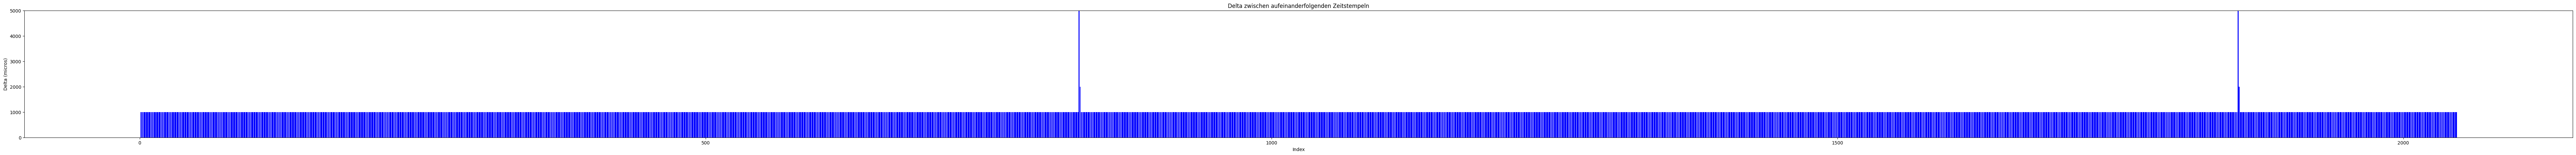

In [4]:
# deltas plotten
plt.figure(figsize=(100, 5))
plt.bar(data.index, data['time_micros_delta'], color='blue')
plt.xlabel('Index')
plt.ylabel('Delta (micros)')
plt.title('Delta zwischen aufeinanderfolgenden Zeitstempeln')

# plt.xlim(500, 1600)  # Fokus auf den interessanten Frequenzbereich
plt.ylim(0, 5000)  # Fokus auf den interessanten Frequenzbereich

plt.show()

In [5]:
# elemente mit großen zeitabständen analysieren um buffer start und ende einzugrenzen

data[data['time_micros_delta'] > 1000]

,id,time_micros,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time_micros_delta
830,0,11264916,9.765453,0.083777,-1.087909,0.043066,-0.054062,0.003054,10241004.0
831,1,11266912,9.730146,0.055652,-1.090303,0.043066,-0.054062,0.003054,1996.0
1854,0,22529913,9.724761,0.086769,-1.075941,0.054672,-0.068417,-0.007636,10241001.0
1855,1,22531912,9.698431,0.038897,-1.159120,0.054672,-0.068417,-0.007636,1999.0


In [6]:
# select time jumps

# suchen wir aus, um start und ende des buffers zu finden

time_jumps = data[data['time_micros_delta'] > 5000]
time_jumps

,id,time_micros,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time_micros_delta
830,0,11264916,9.765453,0.083777,-1.087909,0.043066,-0.054062,0.003054,10241004.0
1854,0,22529913,9.724761,0.086769,-1.075941,0.054672,-0.068417,-0.007636,10241001.0


In [7]:
# fehler, wenn time_jumps != 2 elemente besitzt
if len(time_jumps) != 2:
    raise Exception('''Die Anzahl der Zeitstempelsprünge ist ungleich 2,
                    Anfang und Ende des Buffers konnten nicht eindeutig gefunden werden.''')

In [8]:
# start zeitsprung (time_jumps.index[0]) ist anfang des samples (size:1024), das wir rausziehen wollen
# ende zeitsprung (time_jumps.index[1]) ist ende des samples (size:1024), das wir rausziehen wollen
start_index = 0
end_index = 1

In [9]:
# erstellung sample mit inhalt einer buffer-runde (1024 elemente)
sample_1024 = data.iloc[time_jumps.index[start_index]:time_jumps.index[end_index]].copy()
sample_1024

,id,time_micros,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time_micros_delta
830,0,11264916,9.765453,0.083777,-1.087909,0.043066,-0.054062,0.003054,10241004.0
831,1,11266912,9.730146,0.055652,-1.090303,0.043066,-0.054062,0.003054,1996.0
832,2,11267912,9.775027,0.056849,-1.064571,0.043066,-0.054062,0.003054,1000.0
833,3,11268912,9.773830,0.100533,-1.080729,0.043066,-0.054062,0.003054,1000.0
834,4,11269912,9.740918,0.078392,-1.141766,0.043066,-0.054062,0.003054,1000.0
...,...,...,...,...,...,...,...,...,...
1849,1019,12284912,9.797767,0.073604,-1.174080,0.041539,-0.041844,0.021380,1000.0
1850,1020,12285912,9.771437,0.074801,-1.144758,0.041539,-0.041844,0.021380,1000.0
1851,1021,12286912,9.855813,0.095147,-1.218961,0.041539,-0.041844,0.021380,1000.0
1852,1022,12287912,9.764256,0.068219,-1.135782,0.041539,-0.041844,0.021380,1000.0


In [10]:
# select columnns zum speichern

In [11]:
sample_1024.to_csv('../data/sample_1024.csv', index=False)